## Project 1


### Task 1

#### 1.a)

 Let $𝑚 = 2$ and $𝑛 = 3$, that is, we consider linear systems of the form $𝐴𝒙 = 𝒚$ with $𝐴 ∈ \mathbb{R}^{2×3}$, $𝒙 ∈ \mathbb{R}^3$, and $𝒚 ∈ \mathbb{R}^2$.

Give two examples of 𝐴 and 𝒚 such that

1. the linear system does not have a solution,
2. the linear system has infinitely many solutions.

**SOLUTION**

We have that

$$
Ax =
\begin{pmatrix}
a_{11}x_1 & a_{12}x_2 & a_{13}x_3\\
a_{21}x_1 & a_{22}x_2 & a_{23}x_3
\end{pmatrix} 
$$

$$
y = 
\begin{pmatrix}
y_1 \\
y_2
\end{pmatrix}
$$

which is equivalent to

$$
a_{11} x_1 + a_{12} x_2 + a_{13} x_3 = y_1
$$
$$
a_{21} x_1 + a_{22} x_2 + a_{23} x_3 = y_2
$$

For the first scenario (1.), where the system has no solution and is non-trivial ($A \ne 0$), an example is:

$$
A =
\begin{pmatrix}
1 & -1 & 1\\
-1 & 1 & -1
\end{pmatrix} 
$$

$$
y = 
\begin{pmatrix}
1 \\
1
\end{pmatrix}
$$


And for the second scenario (2.), where the system has infinitely many solutions and is non-trivial ($A \ne 0$), an example is:


$$
A =
\begin{pmatrix}
1 & 0 & 1\\
0 & 1 & 0
\end{pmatrix} 
$$

$$
y = 
\begin{pmatrix}
1 \\
1
\end{pmatrix}
$$



#### 1.b)

Let $𝐴 ∈ \mathbb{R}^{𝑚×𝑛}$, $𝑚 < 𝑛$. Show that both $𝐴^T𝐴$ and $𝐴𝐴^T$ are symmetric, and that both are positive semi-definite.

What can you say about the invertibility of these two matrices if 𝐴 has full rank, that is $rank(𝐴) = 𝑚$?

Hint. Use the identity $(𝐴𝐵)^T = 𝐵^T𝐴^T$, the fact that you can write $𝒙^T𝒙 = ∥𝒙∥^2$ as well as properties of the norm.



**SOLUTION**

Let $x \in \mathbb{R}^n$ and $y \in \mathbb{R}^m$, then

$$x^TA^T Ax = (Ax)^T Ax = ∥Ax∥_2^2 ≥ 0$$

$$y^TAA^Tx = (A^Ty)^T (A^Ty) = ∥A^Ty∥_2^2 ≥ 0$$


When a $m\times n$ matrix has full rank, we know that all columns are linearly independent which implies that the matrix is invertible. $A^T Ax = 0$ for a vector $x \in \mathbb{R}^n$, then $x = 0$

$$x^T A^T Ax = ∥Ax∥_2^2 = 0$$

hence $Ax = 0$, and since $A$ has full rank, then $x = 0$


#### 1.c)

Compute the two gradients $\nabla_x \mathcal{L}(x, \lambda)$ and $\nabla_\lambda \mathcal{L}(x, \lambda)$ from (3) of the Lagrange function
$\mathcal{L}(x, \lambda)$ from (2). Setting both gradients to zero, you can plug the first equation into
the second. Use this to show that the solution to (1) is given by
$$x_{min} = A^T(AA^T)^{−1}y$$

**SOLUTION**

We have the *Lagrange-function*:

$$\mathcal{L}(x, \lambda) = x^T x + \lambda^T (Ax - y)$$

where $\lambda \in \mathbb{R}^n$ are the *Lagrange multipliers*

From the first equation we have that:

$$\begin{align*}
\nabla_x \mathcal{L}(x, \lambda)
&= \nabla_x (x^T x) + \nabla_x(\lambda^T (Ax - y)) \\
&= 2x + (\lambda^T A)^T \\
&= 2x + A^T \lambda\end{align*}$$

We then have that

$$2x + A^T \lambda = 0 \tag{1}$$

From the second equation we get:

$$\begin{align*}
\nabla_\lambda \mathcal{L}(x, \lambda) 
&= Ax - y = 0
\end{align*}$$

Hence:

$$ x = A^{-1}y \tag{2}$$

Inserting $(2)$ in $(1)$, we get:

$$2A^{-1}y + A^Ty = 0 \tag{3}$$

$$\Rightarrow A^T \lambda = -2A^{-1}$$

$$\Rightarrow \lambda_{max} = -2(A A^T)^{-1}$$

Inserting $\lambda_{max}$ in $(1)$

$$2x -2 A^T (A A^T)^{-1} = 0$$

With solution:

$$x_{min} = A^T (A A^T)^{-1} y

#### 1.d)

We further want to use the QR decomposition to solve (4) Show that $x_{min} = QR^{-T}y$ using the reduced QR decomposition of $𝐴^T = 𝑄𝑅$, where $𝑄 \in \mathbb{R}^{n\times m}$ is orthogonal and $R \in \mathbb{R}^{m\times m}$ is upper triangular. Note that for $R$ we have $R^{-T} = (R^T)^{−1} = (R^{−1})^T$.

Implement a function that calculates the QR decomposition using one of the methods explained in lectures. Gram-Schmidt (or even better, Modified Gram-Schmidt), is most likely the easiest one to implement.

**SOLUTION**

We have that:

$$x_{min} = A^T (A A^T)^{-1} y$$

$$A^T = QR$$

Hence (using that $Q^T Q = I$ and assuming that the diagonal elements of $R$ are nonzero):

$$\begin{align*}
x_{min}
&= QR ((QR)^T QR)^{-1} y \\
&= QR (R^T Q^T Q R)^{-1} y \\
&= QR (R^T R)^{-1} y \\
&= QR R^{-1} R^{-T} y \\
&= Q R^{-T} y
\end{align*}$$


**Gram-Schmidt**

In [53]:
import numpy as np
import scipy as sp
from scipy import linalg
import matplotlib.pyplot as plt


Gram-Schmidt method using the method as in the slides:

In [54]:

def gram_schmidt(A):
    n, m = np.shape(A)

    u = np.zeros((n,m))
    Q = np.zeros((n,m))
    R = np.zeros((m,m))

    u[:,0] = A[:,0]
    Q[:,0] = u[:,0]/linalg.norm(u[:,0])

    for k in range(1,m):
        u[:,k] = A[:,k]
        
        for j in range(k):
            u[:,k] -= (A[:,k] @ Q[:,j]) * Q[:,j]

        Q[:,k] = u[:,k]/linalg.norm(u[:,k])
    
    for i in range(m):
        for j in range(i,m):
            R[i,j] = A[:,j] @ Q[:,i]

    return Q, R


Testing for a matrix $A$:

$$A=\begin{pmatrix}
1 & 0 & 1 \\
0 & 1 & 0
\end{pmatrix}$$


In [55]:
A = np.array([[1, 0, 1],
              [0, 1, 0]])


Q, R = gram_schmidt(np.transpose(A))

print(np.transpose(A))
print(Q@R)


[[1 0]
 [0 1]
 [1 0]]
[[1. 0.]
 [0. 1.]
 [1. 0.]]


#### 1.e)

Explain how to calculate $x_{min}$ without inverting $R^T$. Implement a function that calculates $x_{min}$ given the matrices $𝑄, R$ and the left hand side $y$. You can use the forward/backward substitution methods from Exercise 1, or even *scipy.linalg.solve_triangular*. You can for example test your algorithm on the system you proposed in task 1.a).


**SOLUTION**

We have that:

$$ x_{min} = Q R^{-T}y$$

which can be also written as,

$$ R^T Q^T x_{min} = y$$

By substituting $z = Q^T x_{min}$ we get:

$$ R^T z = y$$

This can be solved using LU factorization and get a solution for $z$, which can then be used to get $x_{min}$ by:

$$Q z = Q (Q^T x_{min}) = I x_{min} = x_{min}$$

Testing for a system $Ax = y$:

$$A=\begin{pmatrix}
1 & 0 & 1 \\
0 & 1 & 1
\end{pmatrix}$$

$$y=\begin{pmatrix}
1 \\
1
\end{pmatrix}$$

which has the solution

$$x=\begin{pmatrix}
1-x_3 \\
1 \\
x_3
\end{pmatrix}$$



In [56]:

def solve_xmin(Q, R, y):
    z = sp.linalg.solve_triangular(np.transpose(R), y, lower=True)
    x_min = Q @ z

    return x_min

A = np.array([[1, 0, 1],
              [0, 1, 0]])
y = np.array([1,1])

Q, R = gram_schmidt(np.transpose(A))

x_min = solve_xmin(Q, R, y)

def x_exact(x):
    return np.array([1-x,1,x])

x = np.linspace(0.1,0.9,9)

for i in range(len(x)):
    print("x =",x[i])
    print("x_norm =",np.linalg.norm(x_exact(x[i])))

print(x_min)
print(np.linalg.norm(x_min))


x = 0.1
x_norm = 1.3490737563232043
x = 0.2
x_norm = 1.2961481396815722
x = 0.30000000000000004
x_norm = 1.2569805089976536
x = 0.4
x_norm = 1.2328828005937953
x = 0.5
x_norm = 1.224744871391589
x = 0.6
x_norm = 1.2328828005937953
x = 0.7000000000000001
x_norm = 1.2569805089976536
x = 0.8
x_norm = 1.2961481396815722
x = 0.9
x_norm = 1.3490737563232043
[0.5 1.  0.5]
1.224744871391589


The solution got $∥x_{min}∥ = 1.224744871391589$ as the lowest norm, which corresponds to the exact solution using $x_3 = 0.5$

#### 1.f)

We now want to test our method numerically, and in particular compare against
NumPy implementations. In the handed out code you will find a function *generate_A*
that generates 𝑚 × 𝑛 matrices 𝐴. Given a generated 𝐴, we want to try to solve the
problem for 100 hundred different 𝒚. In the handed out code is a also a chunk that
generates 100 𝒙 which are componentwise i.i.d standard normal distributed using
*np.random.normal(0.0,1.0,(100,n))*, which creates a matrix containing 100 vectors of
size 𝑛. We can then create the left hand sides by calculating 𝒚 = 𝐴𝒙. In the handed out
code these are stored in the arrays X and Y.

**SOLUTION**

Using code handed out. Using a reduction of $f=4$ of the matrix sizes due to a slow computer. 

In [57]:
# Generate matrix A \in \mathbb{R}^{m \times n}

def generate_A(m,n):
    """
    Generates m times n with correlated columns.
    Input:
        m: int, first dimension of A
        n: int, second dimension of A
    output:
        A: (m,n) array
    """

    cov_eigvecs = np.random.uniform(-1.0,1.0,(m,m))
    cov = cov_eigvecs.T @ cov_eigvecs
    v = np.sqrt(np.diag(cov))
    outer_v = np.outer(v, v)
    corr = cov / outer_v
    corr[cov == 0] = 0
    chol = sp.linalg.cholesky(corr, lower=True) 
    A = np.random.normal(0, 1.0,(m,n))
    A = np.dot(chol, A)
    return A

f = 4
m = int(2048/f)
n = int(8096/f)
A = generate_A(m,n)


N = 100 # Number of test data we want to generate

# Generate solutions X columnwise, X[:,i] to access i-th vector
X = np.random.normal(0.0,1.0,(A.shape[1],N))

# Generate left hand sides Y columnwise Y[:,i] to access lhs
Y = np.dot(A,X)

# Doublecheck shapes
print(X.shape) # Expect (n,N)
print(Y.shape) # Expect (m,N)



(2024, 100)
(512, 100)


Timing the method using numpy functions:

In [58]:
%%timeit -r 1 -n 1
AAT = np.dot(A, A.T)
for i in range(N):
    z = np.linalg.solve(AAT,Y[:,i])
    x_sol = np.dot(A.T,z)


1.28 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [59]:
z = np.linalg.solve(A @ np.transpose(A),Y[:,0])
x_sol = np.dot(np.transpose(A),z)

error = np.linalg.norm(x_sol - X[:,0])
print("error = ", error)

error =  38.47680817684252


Timing the method using the Gram-Schmidt method:

In [60]:
%%timeit -r 1 -n 1
Q, R = gram_schmidt(np.transpose(A))
for i in range(N):
    x_sol = solve_xmin(Q, R, Y[:,i])

17.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [61]:
Q, R = gram_schmidt(np.transpose(A))
x_sol = solve_xmin(Q, R, Y[:,0])

error = np.linalg.norm(x_sol - X[:,0])
print("error = ", error)

error =  38.47680817684251


This concludes that the numpy functions are almost 10 times faster. This could be due to the two for-loops used in the Gram-Schmidt method, which for large matrices uses alot of run time. Running only the Gram-Schmidt method took around 15 seconds, which confirms this.

There is no difference in accuracy of the different methods, and it is therefore better to use the numpy functinos to solve this system, than the Gram-Schmidt method.

### Task 2

#### 2.a)

A solution of the Tikhonov regularisation (5) satisfies $\nabla_xT (x) = 0$. Use this to show that a solution $x_r$ of (5) satisfies $(𝐴^TA + \mu𝐼)x_r = 𝐴^Ty$. Show that $𝐴^T𝐴 + \mu 𝐼$ is SPD and therefore invertible.

**SOLUTION**

We have that

$$T(x) = ∥Ax − y∥^2 + \mu∥x∥^2$$

$$\begin{align*}
\nabla_x T(x)
&= \nabla_x(∥Ax − y∥^2 + \mu∥x∥^2) \\
&= 2(A^T A x -A^T y) + 2\mu x = 0
\end{align*}$$

$$\Rightarrow 2 A^T A x_r - 2 A^T y + 2 \mu x_r = 0$$

$$\Rightarrow A^T A x_r + \mu x_r = A^T y$$

$$\Rightarrow (A^T A + \mu I) x_r = A^T y \tag{4}$$

Showing that it is positive-definite:

$$\begin{align*}
x^T M x
&= x^T (A^T A + \mu I)x \\
&= x^T A^T A x + \mu x^T I x \\
&= ∥Ax∥^2 + \mu∥x∥^2
\end{align*}$$

$$∥Ax∥^2 ≥ 0$$

$$\mu∥x∥^2 ≥ 0$$

Which is zero only when $x = 0$.

Showing that it is symmetric:

$$(A^T A)^T = A^T A$$

$\lambda I$ only has elements on its diagonal:

$$\lambda I =
\begin{pmatrix}
\lambda_1 & \cdots & 0\\
\vdots & \ddots & \vdots \\
0 & \cdots & \lambda_n
\end{pmatrix} $$

Which is obviously symmetric.

Since both $A^TA$ and $\mu I$ are SPD, then their sum is SPD aswell and therefore invertible:

$$x_r = (A^T A + \mu I)^{-1} A^T y$$



#### 2.b)

Using the SVD $A = U ΣV^T$, show that $x_r$ satisfies $x_r = V DU^T y$ where $D$ is a diagonal matrix depending on the singular values $Σ$ and the parameter $\mu$. Hint. For two diagonal matrices $D_1, D_2 ∈ \mathbb{R}^{n\times n}$ we have $V D_1 V^T + V D_2 V^T = V (D_1 + D_2) V^T$


**SOLUTION**

We have that,

$$A = U \Sigma V^T \tag{5}$$

Inserting $(4)$ in $(5)$:

$$\begin{align*}
x_r 
&= ((U \Sigma V^T)^T U \Sigma V^T + \mu I)^{-1}(U \Sigma V^T)^T y \\
&= (V \Sigma^T U^T U \Sigma V^T + \mu I)^{-1}V \Sigma^T U^T y \\
&= (V \Sigma^2 V^T + \mu I)^{-1} V \Sigma U^T y \\
&= (V \Sigma^2 V^T + \mu^{-1} I) V \Sigma U^T y \\
&= V (\Sigma^{-2} + \mu^{-1}) \Sigma U^T y \\
&= VDU^Ty
\end{align*}$$

$D = (\Sigma^2 + \mu)^{-1} \Sigma$, $D \in \mathbb{R}^{n\times m}$, which looks like:

$$D =
\begin{pmatrix}
\frac{\sigma_1}{\sigma_1^2+\mu} & \cdots & 0\\
\vdots & \ddots & \vdots \\
0 & \cdots & \frac{\sigma_n}{\sigma_n^2+\mu} \\
\vdots & & \vdots \\
0 & \cdots & 0
\end{pmatrix} $$

Since the $n-m$ last rows are zero vectors, we can also use the reduced matrix:

$$D =
\begin{pmatrix}
\frac{\sigma_1}{\sigma_1^2+\mu} & \cdots & 0\\
\vdots & \ddots & \vdots \\
0 & \cdots & \frac{\sigma_n}{\sigma_n^2+\mu} \\
\end{pmatrix} $$

where $D \in \mathbb{R}^{m\times m}$

We then have to use the reduced $V \in \mathbb{R}^{n\times m}$


#### 2.c)

Write a function *Tikhonov_solveSVD(U,S,Vt,mu)* that computes $x_r$ based on $A$ and $\mu$ using
the SVD approach from 2.b). Note that the singular values $Σ$ should be stored in a vector, not an actual diagonal matrix.

**SOLUTION**

Solving the system:

$$x_r = VDU^T y \tag{6}$$

First by calculating the SVD of $A$, to get $U$, $V$ and $\Sigma$, then creating the matrix $D$:

$$D =
\begin{pmatrix}
\frac{\sigma_1}{\sigma_1^2+\mu} & \cdots & 0\\
\vdots & \ddots & \vdots \\
0 & \cdots & \frac{\sigma_n}{\sigma_n^2+\mu}
\end{pmatrix} $$

Checking dimention of $x_r$:

$\dim{D} = (n \times m) \cdot (m \times m) \cdot (m \times m) \cdot (m \times 1) = n \times 1$

Have to transpose $V$ since the matrix is of shape $m \times n$ when using *np.linalg.svd*

Checking for a system tested earlier, using $\mu = 0$, which corresponds to the least square method

In [62]:
def Tikhonov_solveSVD(U, S, Vt, mu, y):
    D = np.identity(len(S)) * S / (np.power(S,2) + mu)
    x_r = np.transpose(Vt) @ D @ np.transpose(U) @ y
    return x_r

mu = 0

A_test = np.array([[1, -1, 2],
              [1, 1, 1]])
y = np.array([1,1])

U, S, Vt = np.linalg.svd(A_test, full_matrices=False)
x_r = Tikhonov_solveSVD(U, S, Vt, mu, y)
print(x_r)


[0.35714286 0.21428571 0.42857143]


#### 2.d)

We now want to do another numerical experiment. This time we are not interested in solving for many different left hand sides $y$, but rather many different regularisation parameters $\mu$. We use the same function as we did in Task 1 for generating a matrix $A$. Generate 100 logarithmically spaced values of $\mu \in [10−6,106]$ using for example *np.logspace(5,-6,num = 100)* (you should iterate starting with the largest values of $\mu$), and calculate $x_r$ for each of these $\mu$. We denote the solution for a given $\mu$ as $x_r(\mu)$. We want to test two approaches:


**SOLUTION**

**1)**

Creating an array of $\mu$ from $10^5$ to $10^{-6}$ with $N=100$ values

Solving $x_r$ from:

$$x_r = VD_iU^Ty$$

where $D_i = (\Sigma^{-2} + \mu_i^{-1}) \Sigma$ and $\mu_i \in \mu$

Solving the SVD once using *np.linalg.svd*, since the values are constant for different $\mu$

Calculating the error by:

$$e(\mu) = ∥x_r(\mu) - x_{true}∥$$

In [63]:
mu_1 = np.logspace(5,-6,num = N)
error_1 = np.zeros(N)

In [64]:
%%timeit -r 1 -n 1
U, S, Vt = np.linalg.svd(A, full_matrices = False)
for i in range(N):
    x_r = Tikhonov_solveSVD(U, S, Vt, mu_1[i], Y[:,i])
    error_1[i] = np.linalg.norm(x_r - X[:,i])


9.28 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


**2)**

Solving the system:

$$(A^T A + \mu I)x_r = A^T y$$

by using $M = A^TA + \mu I$ and $b = A^T y$, we get:

$$Mx_r = b$$

Then we get $x_r$ by using numpys function *np.linalg.solve(M,b)*

In [65]:
mu_2 = np.logspace(5,-6,num = 10)
error_2 = np.zeros(10)

In [66]:
%%timeit -r 1 -n 1
ATA = np.dot(A.T, A)
b = A.T @ Y
for i in range(10):
    M = ATA + mu_2[i]*np.identity(n)
    x_r = np.linalg.solve(M,b[:,i])
    error_2[i] = np.linalg.norm(x_r - X[:,i])


4.27 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


The numpy functions about one-third less time, but it only used $10$ different values for $\mu$ instead of $100$ for the Tikhonov method. This could mean that if tested with equal amounts of $\mu$ values the Tikhonov method could be faster. This because we use the SVD before the for-loop, which reduces the run time, and it is only necessary to solve for $x_r$ using $U$, $V$ and $\Sigma$

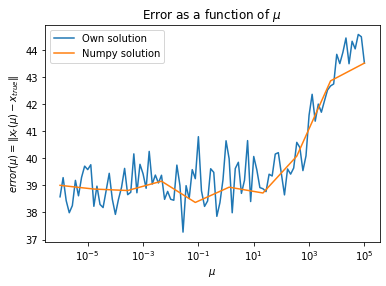

In [67]:
plt.figure()
plt.title(f"Error as a function of $\mu$")
plt.plot(mu_1, error_1, label="Own solution")
plt.plot(mu_2, error_2, label="Numpy solution")
plt.xscale('log')
plt.xlabel(r"$\mu$")
plt.ylabel(r"$error(\mu) = ∥x_r(\mu) - x_{true}∥$")
plt.legend()
plt.show()

We see that the error is almost the same for both methods, and that the solution $x_r$ is closer to $x_{true}$ for a small $\mu$.

### Task 3

#### 3.a)

Let $B = I −WW^T$ and $W$ be a matrix with (pairwise) orthogonal columns. Show that $B$ is a projection matrix (i. e. $𝐵^2 = 𝐵$) and that it is symmetric positive semi-definite.

*Hint.* Use the definition of eigenvalues and eigenvectors 𝐴𝒗 = 𝜆𝒗 to show that a
projection matrix can only have two different eigenvalues.


**SOLUTION**

We know that for pairwise matrices $W^TW = I$, but $WW^T \ne I$

Therefore by solving $B^2$:

$$\begin{align*}
B^2
&= (I - WW^T)(I - WW^T) \\
&= I^2 - IWW^T - WW^TI + WW^TWW^T \\
&= I -WW^T -WW^T + WW^T \\
&= I - WW^T = B
\end{align*}$$

Showing $B$  is symmetric:

$$B^T = (I - WW^T)^T = I^T - (WW^T)^T = I - WW^T = B$$

Showing it is semi-positive definite:

We have that,

$$\lambda^2 v = B^2v = Bv = \lambda v$$

and since $v \ne 0$ we have:

$$\lambda^2 = \lambda$$

Which only has two solutions; $\lambda_1 = 0$ and $\lambda_2 = 1$, and is therefore semi-positive definite


#### 3.c)

Tikhonov regularisation

**1)**


**SOLUTION**

We have the Tikhonov regularisation:

$$T(x) = ∥Ax -y∥^2 + \mu∥Bx∥^2$$

and that the a solution of the Tikhonov regularisation satisfies $\nabla_x T(x) = 0$, we then get

$$\nabla_x T(x) = 2(A^TA x - A^T y) + 2 \mu B^T B x = 0$$

$$\Rightarrow 2A^T A x - 2A^T y + 2\mu B^T B x = 0$$

$$\Rightarrow A^TAx + \mu B^T Bx = A^T y$$

$$\Rightarrow (A^TA + \mu B^TB)x = A^T y$$

And in our case $x = \begin{pmatrix} u \\ v \end{pmatrix} \in \mathbb{R}^{2n}$, $B = \begin{bmatrix} B_0 & 0 \\ 0 & B_1 \end{bmatrix}$, and $A = \begin{bmatrix} I \\ I \end{bmatrix}$ we get:

$$\left( \begin{pmatrix} I \\ I \end{pmatrix}^T \begin{pmatrix} I \\ I \end{pmatrix} + \mu B^T B \right)\begin{pmatrix} u \\ v \end{pmatrix} = \begin{pmatrix} I \\ I \end{pmatrix}^T y$$

$$\Rightarrow
\left(\begin{bmatrix}
I & I \\
I & I
\end{bmatrix}
+
\mu
\begin{bmatrix}
B_0^2 & 0 \\
0 & B_1^2
\end{bmatrix}
\right)
\begin{bmatrix}
u \\ v \end{bmatrix} =
\begin{bmatrix}
y \\ y \end{bmatrix}$$

Which is equivalent to the system (since $B^2 = B$):

$$\begin{bmatrix}
I + \mu B_0 & I \\
I & I + \mu B_1 
\end{bmatrix}
\begin{bmatrix}
u \\ v \end{bmatrix} =
\begin{bmatrix}
y \\ y \end{bmatrix}$$

**2)**

Show that you can solve this by first solving a system $C_0u = d_0$ for some matrix $C_0$ and vector $d_0$, and then another similar system $C_1v = d_1$.


**SOLUTION**

The system is:

1. $$(I+\mu B_0)u + Iv = y$$

2. $$Iu + (I+\mu B_1)v = y$$

The first one can be written as:

$$(I + \mu B_0) u = y - v$$

and by subsitution $C_0 = \mu B_0$ and $d_0 = y - v$, we get:

$$C_0 u = d_0 \tag{7}$$

With the second one we get (using the solution of $u$ from the previous system):

$$(I + \mu B_1) v = y - u$$

and by substituting $C_1 = I + \mu B_1$ and $d_1 = y - u$, we get:

$$C_1 v = d_1 \tag{8}$$

Since we dont have the first $v$, we use first $v_0=0$ and iterate such that we use the previous $v_{i-1}$ to calculate the next $v_i$


#### 3)

Implement a suitable method for calculating 𝒖 and 𝒗 using the Tikhonov regularisation approach. You can use any method from the lecture or this project, including any NumPy or SciPy functions. Make sure to concisely explain your method and potential advantages/disadvantages. Select for example $\mu = 1.0$, but feel free to try other parameters.

**SOLUTION**

Solving first:

$$C_0 u = d_0$$

where $C_0 = \mu B_0$ and $d_0 = 0$, by using *np.linalg.solve(C_0,d_0)*

Then solve the second system using the previous solution $u$:

$$C_1 v = d_1$$

where $C_1 = I + \mu B_1$ and $d_1 = y - u$ with *np.linalg.solve(C_1,d_1)*

In [118]:
mu = 1.0

def Tikhonov_solve(B_0, B_1, y, d):
    C_0 = np.identity(n) + mu * B_0
    d_0 = y - d
    u = np.linalg.solve(C_0, d_0)

    C_1 = np.identity(n) + mu * B_1
    d_1 = y - u

    v = np.linalg.solve(C_1, d_1)

    return np.array((u, v))


#### 3.d)

Test the solver you developed in 3.b) or 3.c) by first loading the basis vectors stored
in W0.npy and W1.npy. See the handed out code for how to do this. Test your method
on the data in mixed.npy, which contains 100 different test examples. Time how long
it takes to separate all 100 images, and plot at least one example and the resulting
separated images. Make a quick qualitative assessment of the separated image(s). Does
this approach work for single channel source separation? Does the approach have some
drawbacks?


**SOLUTION**

(784, 100)


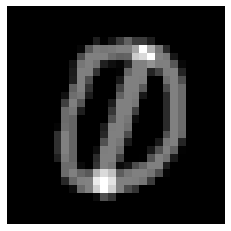

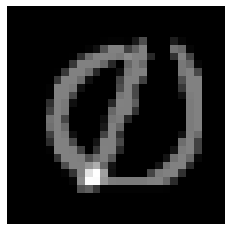

In [93]:
Mixes = np.load('Data/mixed.npy')
print(Mixes.shape) # Should be (784,100)

plt.imshow(Mixes[:,1].reshape((28,28)), cmap = 'gray')
plt.axis('off') # Removes the x and y axis to plot only the image
plt.show()

plt.imshow(Mixes[:,32].reshape((28,28)), cmap = 'gray')
plt.axis('off') # Removes the x and y axis to plot only the image
plt.show()

(784, 16)
(784, 16)


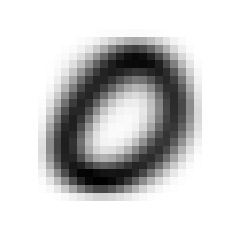

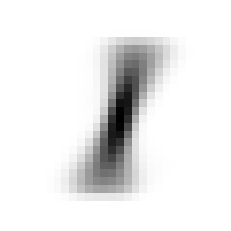

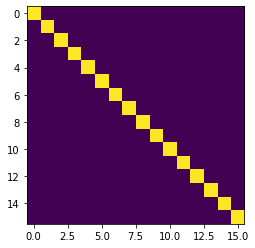

In [131]:
W0 = np.load('Data/W0.npy')
W1 = np.load('Data/W1.npy')
print(W0.shape) # Should be (784,16)
print(W1.shape) # Should be (784,16)

plt.imshow(W0[:,0].reshape((28,28)), cmap = 'gray')
plt.axis('off')
plt.show()

W0TW0 = np.dot(W0.T, W0)
plt.imshow(W0TW0)
plt.show()

First creating the matrices $B_0$ and $B_1$ using the basis vectores $W_0$ and $W_1$. Then creating a iterated for-loop to calculate $u$ and $v$. First iteration using $v=0$, then for the next one use the previous solution for $v$. Iterating 100 times and plotting results.

In [127]:
n = 784

B_0 = np.identity(n) - W0 @ np.transpose(W0)
B_1 = np.identity(n) - W1 @ np.transpose(W1)



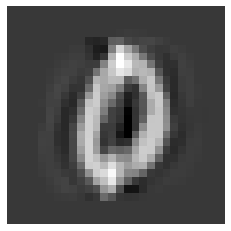

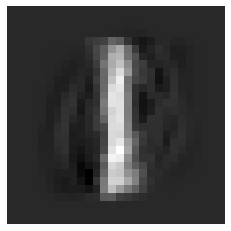

5.22 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [130]:
%%timeit -r 1 -n 1
d_prev = 0
for i in range(100):
    d_next = d_prev
    x = Tikhonov_solve(B_0, B_1, Mixes[:,i], d_next)
    u, v = x
    d_prev = v

plt.imshow(u.reshape((28,28)), cmap = 'gray')
plt.axis('off')
plt.show()
plt.imshow(v.reshape((28,28)), cmap = 'gray')
plt.axis('off')
plt.show()

We see that we manage to split the data into 0 and 1 to a certain degree. Could have iterated for a longer period and use a stopping criterion such that the two images are least equal. To conclude it took 70 seconds to separate 100 images.